In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# Lab 7 Learning rate and Evaluation
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

c:\Users\DMQA\miniconda3\envs\pytorch_env\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\DMQA\miniconda3\envs\pytorch_env\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

print(device)

cuda


## torchvision.datasets.MNIST
-  root 
    - 데이터셋의 위치

- train
    - true : train set 불러옴
    - false : test set 불러옴

- transform
    - 일반적으로 PyTorch의 경우 : 0에서 1 사이의 값, 순서는 채널, 높이, 너비(C, H, W)
    - 일반적으로 이미지의 경우 : 0에서 255 사이의 값, 순서는 높이, 너비, 채널(H, W, C)
    - ToTensor : 이미지의 값들을 PyTorch에 맞게 바꿔줌

- download 
    - download : 만약 해당 위치에 데이터가 존재하지 않으면 데이터를 다운로드 받겠다.

In [4]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

## torch.utils.DataLoader
- DataLoader
    - 어떤 데이터 로드할거냐

- batch_size
    - batch size

- shuffle
    - True : 무작위로 불러올래? 
    - False : 그냥 있는 순서대로 불러올래?

- drop_last
    - 짤라서 사용할 때 뒤에 남는 애들 어떡할래?
    - True : 남는 데이터 사용하지 않음

In [8]:
# parameters
training_epochs = 15
batch_size = 100

In [9]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [10]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)



In [11]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [12]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device) # (batch_size, 1, 28, 28) -> (batch_size, 784)
        Y = Y.to(device)

        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')



Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577775
Epoch: 0003 cost = 0.331264257
Epoch: 0004 cost = 0.316404700
Epoch: 0005 cost = 0.307107002
Epoch: 0006 cost = 0.300456524
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074089
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526860
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422735
Learning finished


Accuracy: 0.8883000016212463
Label:  8
Prediction:  3


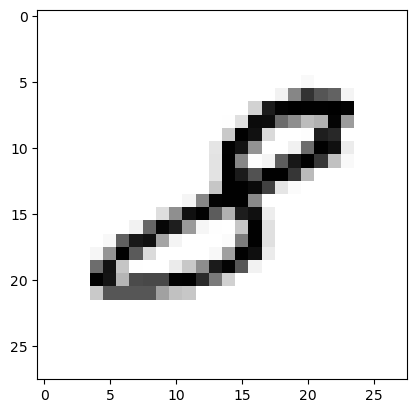

In [13]:
# Test the model using test sets (grad 안하겠다)
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()